In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


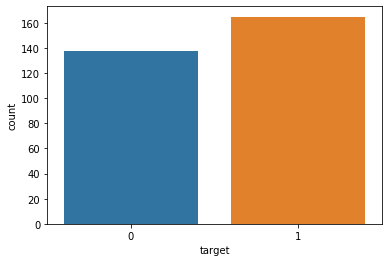

In [3]:
sns.countplot(x='target', data= data)

In [4]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#separate features and target variable
x = data.drop(['target'], axis=1)
y= data['target']

In [9]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

In [10]:
x_minmax = mm.fit_transform(x)

In [7]:
x_scaled = ss.fit_transform(x)

In [8]:
X = pd.DataFrame(x_scaled, columns = x.columns)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [11]:
X_mm = pd.DataFrame(x_minmax, columns = x.columns)
X_mm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [12]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_mm, y, test_size=0.3, random_state=56)

In [13]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

# Gaussian Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [15]:
#train the model and make predictions
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)

In [16]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7692307692307693

## Multinomial Naive Bayes

In [17]:
tweets_data = pd.read_csv('tweets.csv')
tweets_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [18]:
#separate features and target variable
x = tweets_data['tweet']
y = tweets_data['label']

In [19]:
#create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

### Create bag-of-words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words = 'english')

In [21]:
# Fit the training data
training_data = count_vector.fit_transform(x_train)
# Transform testing data
testing_data = count_vector.transform(x_test)

### Implement Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [23]:
#train model and make predictions
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7993827160493827

# Bernoulli Naive Bayes

In [25]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()

In [26]:
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7638773819386909